In [72]:
#코랩 연결 # 모델 저장 or 불러오기
from google.colab import drive
drive.mount('/content/drive')


from tensorflow.keras.models import load_model
model=load_model('./drive/MyDrive/saved_model/MEDVISION.hdf5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
#이미지 넣기
import glob
from google.colab import files

uploaded=files.upload()
first_key = next(iter(uploaded.keys()))

from IPython.display import Image
# Image(first_key)

Saving cepacol2.115.jpg to cepacol2.115.jpg


In [74]:
# import random
# 이미지 인식 , 수치 계산산
import numpy as np
import cv2

img_width=150
img_height=150
label_dict={'asprin2':0,'cepacol2':1,'mucinex2':2,'zicam2':3}

test_image_files_list=glob.glob(first_key)

# random.shuffle(test_image_files_list)

test_num=1

test_image_files=test_image_files_list[:test_num] #태스트 파일이름은 정답,숫자.jpg

src_img_list=[]

for i in range(len(test_image_files)):
  src_img=cv2.imread(test_image_files[i],cv2.IMREAD_COLOR)
  src_img=cv2.resize(src_img,dsize=(img_width,img_height))
  src_img=cv2.cvtColor(src_img,cv2.COLOR_BGR2RGB)
  src_img=src_img/255.0

  src_img_list.append(src_img)


#4차원 텐서 변환
src_img_array=np.array(src_img_list)


In [75]:
pred=model.predict(src_img_array)
print(pred.shape) #(추측하고자 하는 이미지의 갯수, 정답이 될수 있는 가짓 수)

1/1 [==============================] - 1s 504ms/step
(1, 4)


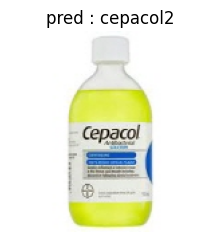

cepacol2


In [76]:
# 출력
import matplotlib.pyplot as plt

class_names=['asprin2','cepacol2','mucinex2','zicam2']

plt.figure(figsize=(9,9))

for pos in range(len(pred)):

  plt.subplot(4,4,pos+1)
  plt.axis('off')

  pred_str=class_names[np.argmax(pred[pos])]

  plt.title( "pred : " + pred_str)

  plt.imshow(src_img_array[pos])

plt.tight_layout()
plt.show()

print(pred_str)